In [12]:
!pip install torch torchvision scikit-learn

#Anothe Version

In [13]:
!pip install shap

XAI-GRADCAM

In [14]:
# import cv2
# import torchvision.transforms.functional as F
# class GradCAM:
#     def __init__(self, model):
#         self.model = model
#         self.model.eval()
#         self.gradients = None
#         self.target_layer = None  # Set this to the layer you want to visualize

#     def get_gradients(self, grad):
#         self.gradients = grad

#     def forward(self, x):
#         # Register the hook to capture gradients
#         self.target_layer.register_backward_hook(self.get_gradients)
#         output = self.model(x)
#         return output

#     def generate_cam(self, input_image, class_index):
#         # Forward pass
#         output = self.forward(input_image)
#         one_hot_output = torch.zeros(output.size(), dtype=torch.float).to(input_image.device)
#         one_hot_output[0][class_index] = 1  # Set the class index you want to visualize
#         self.model.zero_grad()
#         output.backward(gradient=one_hot_output)

#         # Generate the CAM
#         gradients = self.gradients.data.cpu().numpy()[0]  # (num_channels)
#         activations = self.target_layer.output.data.cpu().numpy()[0]  # (num_channels, H, W)
#         weights = np.mean(gradients, axis=(1, 2))  # (num_channels)

#         cam = np.zeros(activations.shape[1:], dtype=np.float32)  # (H, W)
#         for i, w in enumerate(weights):
#             cam += w * activations[i]  # Weighted sum of activations

#         cam = np.maximum(cam, 0)  # ReLU
#         cam /= np.max(cam)  # Normalize to [0, 1]
#         return cam
# def visualize_grad_cam(input_image, cam):
#     # Convert the CAM to the appropriate size
#     cam = cv2.resize(cam, (input_image.shape[2], input_image.shape[1]))
#     cam = np.uint8(255 * cam)  # Scale to [0, 255]
    
#     # Apply a colormap to the CAM
#     heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    
#     # Convert the original image from tensor to numpy
#     original_image = input_image.squeeze().permute(1, 2, 0).cpu().numpy()  # (H, W, C)
#     original_image = (original_image * 255).astype(np.uint8)  # Scale to [0, 255]

#     # Overlay the heatmap on the original image
#     superimposed_img = cv2.addWeighted(original_image, 0.5, heatmap, 0.5, 0)
    
#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.imshow(original_image)
#     plt.title('Original Image')
#     plt.axis('off')
    
#     plt.subplot(1, 2, 2)
#     plt.imshow(superimposed_img)
#     plt.title('GRAD-CAM')
#     plt.axis('off')
    
#     plt.show()
# # def explain_with_grad_cam(model, test_loader, adj1, adj2):
# #     grad_cam = GradCAM(model)
    
# #     # Get a sample image and label from the test loader
# #     images, labels = next(iter(test_loader))
# #     images = images.to(device)
# #     adj1 = adj1.to(device)  # Ensure the adjacency matrices are on the same device
# #     adj2 = adj2.to(device)

# #     # Assume class index for visualization is the index of the predicted class
# #     with torch.no_grad():
# #         output = model(images, adj1, adj2)  # Forward pass with adjacency matrices
# #         predicted_classes = torch.argmax(output, dim=1)  # Get the predicted class index

# #     # Visualize GRAD-CAM for each image in the batch
# #     for i in range(images.size(0)):
# #         cam = grad_cam.generate_cam(images[i:i+1], predicted_classes[i].item())
# #         visualize_grad_cam(images[i:i+1], cam)

# def explain_with_grad_cam(model, test_loader, adj1, adj2):
#     # Move the adjacency matrices to the same device as the model
#     device = next(model.parameters()).device  # Get the device of the model
#     adj1 = adj1.to(device)
#     adj2 = adj2.to(device)

#     model.eval()  # Set the model to evaluation mode
#     for images, labels in test_loader:
#         images = images.to(device)  # Move images to the correct device

#         with torch.no_grad():
#             output = model(images, adj1, adj2)  # Forward pass with adjacency matrices
#             predicted_classes = torch.argmax(output, dim=1)  # Get the predicted class index

#         # Visualize GRAD-CAM for each image in the batch
#         for i in range(len(images)):
#             # Assuming you have a function to visualize the GRAD-CAM
#             visualize_grad_cam(images[i], predicted_classes[i], output[i])  # Replace with your visualization function



In [15]:
import numpy as np
import torch

def create_adjacency_matrices(data):
    # Create adjacency matrices based on your graph structure
    num_nodes = len(data)  # Adjust based on your dataset
    adj1 = np.zeros((num_nodes, num_nodes))  # Initialize adjacency matrix
    adj2 = np.zeros((num_nodes, num_nodes))  # Initialize second adjacency matrix

    # Define your edges
    edges = [
        (0, 1),
        (0, 2),
        (1, 2),
        (2, 3),
        # Add more edges as needed based on your data
    ]

    # Populate adj1 and adj2 based on the edges
    for src, tgt in edges:
        adj1[src, tgt] = 1  # or appropriate weight
        adj1[tgt, src] = 1  # if undirected graph

    # Optionally define adj2 similarly
    # For example, you could add different weights or relationships here

    return torch.FloatTensor(adj1), torch.FloatTensor(adj2)  # Convert to tensors


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1/3, Train Loss: 1284.8367, Train Accuracy: 0.8271, Val Loss: 804.1821, Val Accuracy: 0.9357
Epoch 2/3, Train Loss: 892.1678, Train Accuracy: 0.8886, Val Loss: 878.8681, Val Accuracy: 0.9429
Epoch 3/3, Train Loss: 752.5908, Train Accuracy: 0.9050, Val Loss: 835.9471, Val Accuracy: 0.8964
Test Loss: 255.7186, Test Accuracy: 0.9286


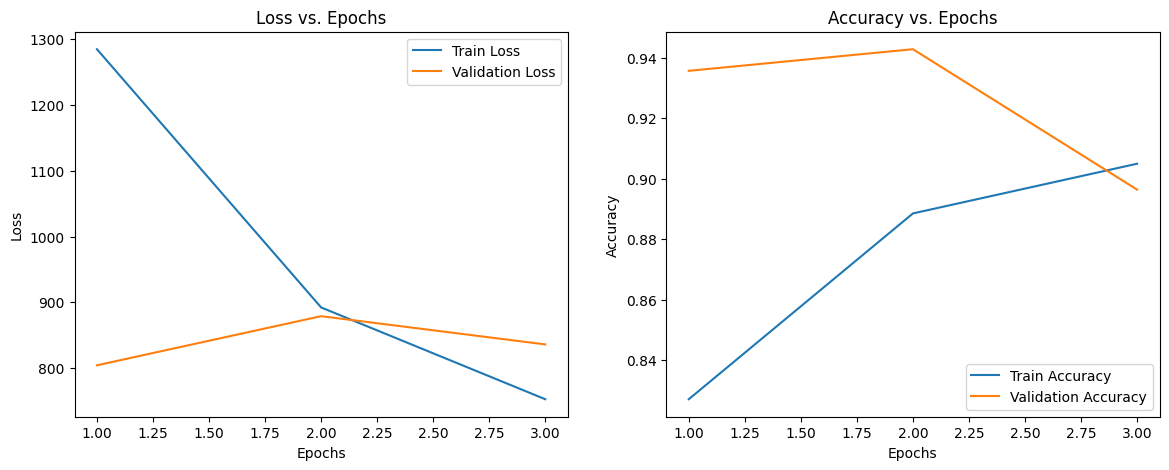

No positive samples in y_true, true positive value should be meaningless
No positive samples in y_true, true positive value should be meaningless
No positive samples in y_true, true positive value should be meaningless
No positive samples in y_true, true positive value should be meaningless
No positive samples in y_true, true positive value should be meaningless
No positive samples in y_true, true positive value should be meaningless
No positive samples in y_true, true positive value should be meaningless
No positive samples in y_true, true positive value should be meaningless


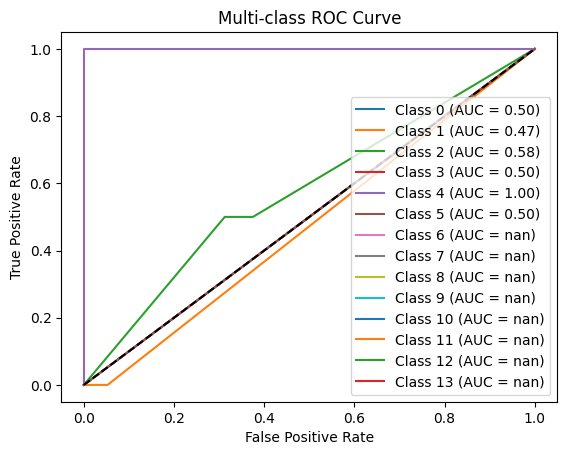

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import shap
import os
import pandas as pd

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, image_dir, csv_file, data_size, transform=None):
        self.image_dir = image_dir
        self.csv_file = csv_file
        self.transform = transform
        self.image_names = os.listdir(image_dir)[:data_size]
        self.labels = pd.read_csv(csv_file, index_col=0).values[:data_size]

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# GAT Layer
class GATLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GATLayer, self).__init__()
        self.W = nn.Parameter(torch.randn(input_dim, output_dim))
        self.a = nn.Parameter(torch.randn(2 * output_dim, 1))
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.2)

    def _prepare_attention(self, Wh):
        N = Wh.size(0)
        Wh_repeated_in_chunks = Wh.repeat_interleave(N, dim=0)
        Wh_repeated_alternating = Wh.repeat(N, 1)
        all_combinations_matrix = torch.cat([Wh_repeated_in_chunks, Wh_repeated_alternating], dim=1)
        return all_combinations_matrix.view(N, N, 2 * Wh.size(1))

    def forward(self, h, adj):
        Wh = torch.matmul(h, self.W)  # (N, output_dim)
        a_input = self._prepare_attention(Wh)
        e = self.leaky_relu(torch.matmul(a_input, self.a).squeeze(2))
        attention = torch.softmax(e.masked_fill(adj == 0, -1e9), dim=1)  # Mask out zeros in the adj
        h_prime = torch.matmul(attention, Wh)
        return h_prime

# MLAGCN Model
class MLAGCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLAGCN, self).__init__()
        self.gat1 = GATLayer(input_dim, hidden_dim)
        self.gat2 = GATLayer(hidden_dim, hidden_dim)
        self.gcn1 = GATLayer(hidden_dim, output_dim)

    def forward(self, x, adj1, adj2):
        h1 = self.gat1(x, adj1)
        h2 = self.gat2(h1, adj2)
        gcn_out1 = self.gcn1(h2, adj2)
        return gcn_out1

import matplotlib.pyplot as plt

def train_model_with_validation(model, train_loader, val_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            # Extract features for each image directly (images are already tensors)
            with torch.no_grad():
                image_features = resnet_model(images)  # Extract features directly from ResNet
            image_features = image_features.view(image_features.size(0), -1)  # Flatten features

            # Dummy adjacency matrices (replace with actual graph structures)
            adj1 = torch.eye(image_features.size(0))  # Identity matrix as dummy graph
            adj2 = torch.eye(image_features.size(0))  # Identity matrix

            # Forward pass
            outputs = model(image_features, adj1, adj2)
            loss = criterion(outputs, labels.float())

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Calculate accuracy
            predictions = torch.sigmoid(outputs) > 0.5
            correct += (predictions == labels).sum().item()
            total += labels.numel()

        train_loss = total_loss / len(train_loader)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        val_loss, val_accuracy = evaluate_model_with_metrics(model, val_loader)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return train_losses, train_accuracies, val_losses, val_accuracies

# Evaluate model and plot ROC curve
def evaluate_and_plot_roc(model, loader, num_classes):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for images, labels in loader:
            image_features = resnet_model(images)
            image_features = image_features.view(image_features.size(0), -1)
            adj1 = torch.eye(image_features.size(0))
            adj2 = torch.eye(image_features.size(0))
            outputs = model(image_features, adj1, adj2)
            y_true.append(labels.numpy())
            y_scores.append(torch.sigmoid(outputs).numpy())

    y_true = np.vstack(y_true)
    y_scores = np.vstack(y_scores)

    # Binarize labels for multi-class ROC
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

    # Compute ROC curve and AUC for each class
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc='best')
    plt.show()

def evaluate_model_with_metrics(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    criterion = nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for images, labels in loader:
            with torch.no_grad():
                image_features = resnet_model(images)
            image_features = image_features.view(image_features.size(0), -1)
            adj1 = torch.eye(image_features.size(0))
            adj2 = torch.eye(image_features.size(0))
            outputs = model(image_features, adj1, adj2)
            loss = criterion(outputs, labels.float())
            total_loss += loss.item()

            predictions = torch.sigmoid(outputs) > 0.5
            correct += (predictions == labels).sum().item()
            total += labels.numel()

    average_loss = total_loss / len(loader)
    accuracy = correct / total
    return average_loss, accuracy

# Train Loss Tran Accuracy
def plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs. Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Train Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs. Epochs")
    plt.legend()
    plt.show()

# Main function
def main():
    train_image_dir = "/kaggle/input/chest-dummy-image/Chest_train_Image_100/Chest_train_Image_100"
    train_csv_file = "/kaggle/input/chest-label/Train_list.csv"
    val_image_dir = "/kaggle/input/dummy-val-image-20/Chest_Val_Image_20"
    val_csv_file = "/kaggle/input/chest-label/Val_list.csv"
    test_image_dir = "/kaggle/input/chest-dummy-image/Chest_test_Image_20/Chest_test_Image_20"
    test_csv_file = "/kaggle/input/chest-label/Test_list.csv"

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    train_dataset = CustomDataset(train_image_dir, train_csv_file, data_size=100, transform=transform)
    val_dataset = CustomDataset(val_image_dir, val_csv_file, data_size=20, transform=transform)
    test_dataset = CustomDataset(test_image_dir, test_csv_file, data_size=20, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

    global resnet_model
    resnet_model = models.resnet50(pretrained=True)
    resnet_model = nn.Sequential(*list(resnet_model.children())[:-1])
    resnet_model.eval()

    model = MLAGCN(input_dim=2048, hidden_dim=512, output_dim=14)

    # train_model_with_validation(model, train_loader, val_loader, num_epochs=3)
    # Train the model
    train_losses, train_accuracies, val_losses, val_accuracies = train_model_with_validation(
        model, train_loader, val_loader, num_epochs=3
    )

    test_loss, test_accuracy = evaluate_model_with_metrics(model, test_loader)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Plot metrics
    plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)

    # ROC
    evaluate_and_plot_roc(model, test_loader, num_classes=14)
    # explain_predictions(model, test_loader)

    # # Create or load adjacency matrices
    # adj1, adj2 = create_adjacency_matrices(train_loader.dataset)

    # # Move adjacency matrices to the correct device
    # device = next(model.parameters()).device
    # adj1 = adj1.to(device)
    # adj2 = adj2.to(device)

    # # Call this function after your training and evaluation, providing the adjacency matrices
    # explain_with_grad_cam(model, test_loader, adj1, adj2)


if __name__ == "__main__":
    main()
